<a href="https://colab.research.google.com/github/ChagataiDuru/CS304-IntroAI-CollabNotebooks/blob/main/Bonus_Homework.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Question:
Given the 2D data points $(1,1)$, $(2,2)$, and $(3,3)$:

Part a.) Determine the first principal component by finding the covariance matrix, eigenvectors, and eigenvalues.

Part b.) Calculate the variance of the data when projected onto the principal component.

Part c.) Compute the reconstruction error when the projected 1D data is represented back in the original 2D space.

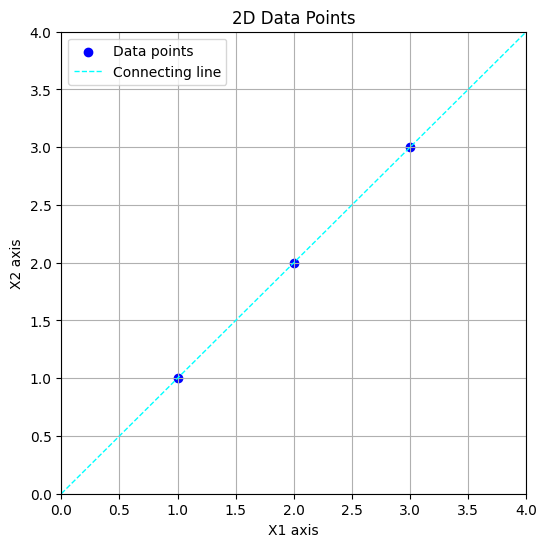

In [1]:
import matplotlib.pyplot as plt
import numpy as np

# Define the data points
data_points = np.array([[1, 1], [2, 2], [3, 3]])

# Separate the data into x and y coordinates
x = data_points[:, 0]
y = data_points[:, 1]

# Plot the data points
plt.figure(figsize=(6, 6))
plt.scatter(x, y, color='blue', label='Data points')
x_vals = np.linspace(0, 4, 100)
y_vals = x_vals
plt.plot(x_vals, y_vals, color='cyan', linestyle='--', linewidth=1, label='Connecting line')
plt.xlim(0, 4)
plt.ylim(0, 4)
plt.xlabel('X1 axis')
plt.ylabel('X2 axis')
plt.title('2D Data Points')
plt.grid(True)
plt.axhline(0, color='black', linewidth=0.5)
plt.axvline(0, color='black', linewidth=0.5)
plt.legend()
plt.show()


# Part a) Determine the first principal component

## Step 1: Subtract the mean (Center the data)

Given data points:

$$(1,1), (2,2), (3,3)$$


Calculate the mean of the data:

$$\text{Mean} = \left( \frac{1+2+3}{3}, \frac{1+2+3}{3} \right) = (2, 2)$$


Center the data by subtracting the mean:

$$(1-2, 1-2) = (-1, -1)$$


$$(2-2, 2-2) = (0, 0)$$


$$(3-2, 3-2) = (1, 1)$$


Centered data:

$$(-1, -1), (0, 0), (1, 1)$$



In [2]:
# Given data points
data = np.array([[1, 1], [2, 2], [3, 3]])

# Calculate the mean of the data
mean = np.mean(data, axis=0)

# Center the data by subtracting the mean
centered_data = data - mean

print("Centered data:")
print(centered_data)

Centered data:
[[-1. -1.]
 [ 0.  0.]
 [ 1.  1.]]


## Step 2: Calculate the covariance matrix

The formula for the covariance matrix is:

$\Sigma = \frac{1}{n-1} X^T X$

Where \( X \) is the matrix of centered data points:
\[
$$X = \begin{pmatrix}
-1 & -1 \\
0 & 0 \\
1 & 1 \\
\end{pmatrix}$$
\]

The covariance matrix:

$$\Sigma = \frac{1}{3-1} \begin{pmatrix}
-1 & 0 & 1 \\
-1 & 0 & 1 \\
\end{pmatrix}
\begin{pmatrix}
-1 & -1 \\
0 & 0 \\
1 & 1 \\
\end{pmatrix}$$
$$= \frac{1}{2} \begin{pmatrix}
2 & 2 \\
2 & 2 \\
\end{pmatrix}$$
$$= \begin{pmatrix}
1 & 1 \\
1 & 1 \\
\end{pmatrix}$$



In [3]:
# Calculate the covariance matrix
cov_matrix = np.cov(centered_data, rowvar=False)

print("Covariance matrix:")
print(cov_matrix)

Covariance matrix:
[[1. 1.]
 [1. 1.]]


## Step 3: Find eigenvectors and eigenvalues

Solve for λ  in \( $$\text{det}(\Sigma - \lambda I) = 0 \$$):


$$\Sigma - \lambda I = \begin{pmatrix}
1-\lambda & 1 \\
1 & 1-\lambda \\
\end{pmatrix}$$

$$\text{det}(\Sigma - \lambda I) = (1-\lambda)^2 - 1 = 0$$

$$\lambda^2 - 2\lambda = 0$$

$$\lambda (\lambda - 2) = 0$$

Eigenvalues:

$$\lambda_1 = 2, \quad \lambda_2 = 0$$

Find eigenvectors $$ v $$ by solving $$(\Sigma - \lambda I) v = 0$$:

For $$\lambda_1 = 2 $$:

$$\begin{pmatrix}
-1 & 1 \\
1 & -1 \\
\end{pmatrix}
\begin{pmatrix}
v_1 \\
v_2 \\
\end{pmatrix}
= 0$$


This simplifies to:

$$v_1 = v_2$$


Normalized eigenvector for \( $$\lambda_1 = 2 \$$):

$$v = \frac{1}{\sqrt{2}} \begin{pmatrix}
1 \\
1 \\
\end{pmatrix}$$


So, the first principal component is:

$$\mathbf{PC1} = \frac{1}{\sqrt{2}} (1, 1)$$


In [4]:
# Calculate eigenvectors and eigenvalues
eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)

print("Eigenvalues:")
print(eigenvalues)

print("Eigenvectors:")
print(eigenvectors)

# First principal component
pc1 = eigenvectors[:, np.argmax(eigenvalues)]
print("First principal component (PC1):")
print(pc1)

Eigenvalues:
[2. 0.]
Eigenvectors:
[[ 0.70710678 -0.70710678]
 [ 0.70710678  0.70710678]]
First principal component (PC1):
[0.70710678 0.70710678]


# Part b) Calculate the variance of the data when projected onto the principal component

Projection of data points onto $$ \mathbf{PC1} $$:

$$(-1, -1) \cdot \frac{1}{\sqrt{2}}(1, 1) = -\sqrt{2}$$

$$(0, 0) \cdot \frac{1}{\sqrt{2}}(1, 1) = 0$$

$$(1, 1) \cdot \frac{1}{\sqrt{2}}(1, 1) = \sqrt{2}$$


Projected data: $$ -\sqrt{2}, 0, \sqrt{2} $$

Variance of projected data:

$$\text{Variance} = \frac{1}{n-1} \sum (x_i - \mu)^2$$


Mean of projected data: $$ \mu = 0 $$

$$\text{Variance} = \frac{1}{2} \left( (-\sqrt{2})^2 + 0^2 + (\sqrt{2})^2 \right) = \frac{1}{2} \left( 2 + 0 + 2 \right) = 2$$


In [5]:
# Project the data onto the first principal component
projected_data = centered_data.dot(pc1)

print("Projected data:")
print(projected_data)

# Calculate the variance of the projected data
variance = np.var(projected_data, ddof=1)

print("Variance of the projected data:")
print(variance)

Projected data:
[-1.41421356  0.          1.41421356]
Variance of the projected data:
1.9999999999999996


# Part c) Compute the reconstruction error

Reconstruction in the original 2D space involves projecting the 1D data back:

Original data $$ (x, y) $$:

$$(-\sqrt{2}) \cdot \frac{1}{\sqrt{2}}(1, 1) = (-1, -1)$$


$$(0) \cdot \frac{1}{\sqrt{2}}(1, 1) = (0, 0)$$


$$(\sqrt{2}) \cdot \frac{1}{\sqrt{2}}(1, 1) = (1, 1)$$


Reconstructed data: $$ (-1, -1), (0, 0), (1, 1) $$

The reconstruction error is the distance between original and reconstructed data:

$$\sum \left( (x_i - \hat{x_i})^2 + (y_i - \hat{y_i})^2 \right)$$


However, since the reconstructed points match the centered original points, the reconstruction error is zero.


In [6]:
# Reconstruct the data from the projected data
reconstructed_data = np.outer(projected_data, pc1)

print("Reconstructed data:")
print(reconstructed_data)

# Compute the reconstruction error
reconstruction_error = np.sum((centered_data - reconstructed_data) ** 2)

print("Reconstruction error:")
print(reconstruction_error)

Reconstructed data:
[[-1. -1.]
 [ 0.  0.]
 [ 1.  1.]]
Reconstruction error:
1.9721522630525295e-31
